In [2]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('E7_data.csv')

# Print descriptive statistics
print("Descriptive Statistics:")
print(df.describe())

Descriptive Statistics:
                id  recorded_day  air_pressure     max_temp  temperature  \
count  2190.000000   2190.000000   2081.000000  2180.000000  2169.000000   
mean   1094.500000    183.000000   1013.583950    26.375092    23.948271   
std     632.342866    105.390093      5.659905     5.649460     5.220888   
min       0.000000      1.000000    999.000000    10.400000     7.400000   
25%     547.250000     92.000000   1008.600000    21.300000    19.300000   
50%    1094.500000    183.000000   1013.000000    27.800000    25.500000   
75%    1641.750000    274.000000   1017.800000    31.200000    28.400000   
max    2189.000000    365.000000   1034.600000    36.000000    31.500000   

          min_temp    dew_point     humidity  cloud_cover   wind_speed  
count  2180.000000  2190.000000  1971.000000  1971.000000  2169.000000  
mean     22.179404    20.454566    82.066464    75.638255    21.816183  
std       5.051336     5.288406     7.804278    18.133950     9.906203  

In [3]:
# Check for missing values in the dataset
missing_values = df.isnull().sum()
print("\nMissing Values in Each Column:")
print(missing_values)


Missing Values in Each Column:
id                0
recorded_day      0
air_pressure    109
max_temp         10
temperature      21
min_temp         10
dew_point         0
humidity        219
cloud_cover     219
wind_speed       21
raining           0
dtype: int64


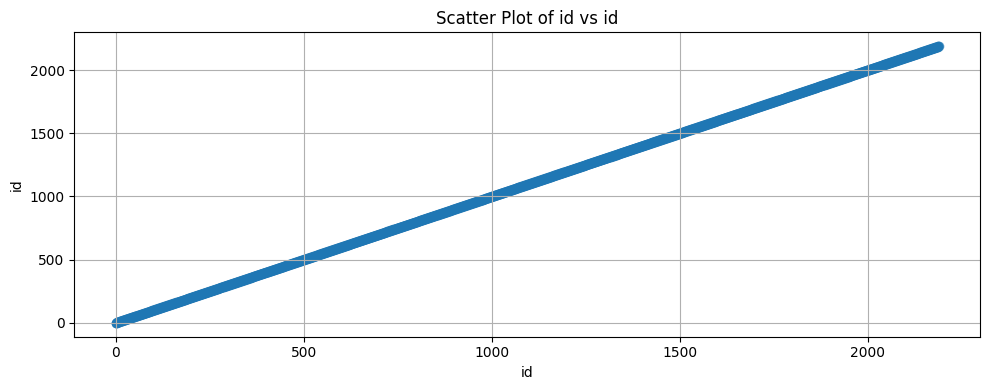

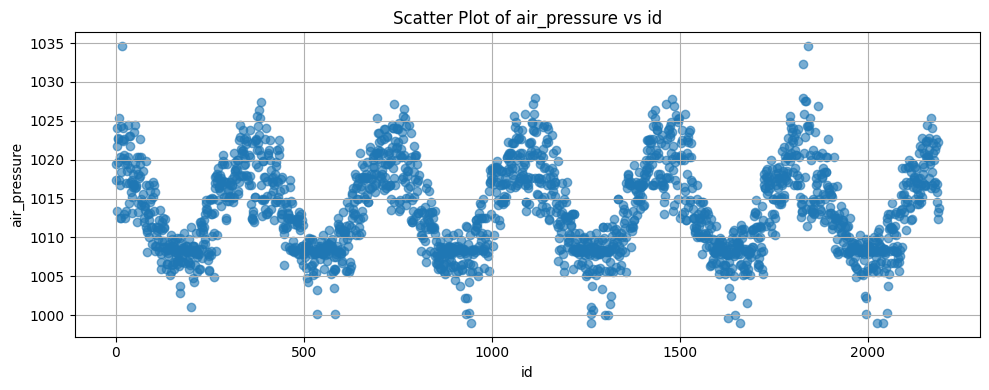

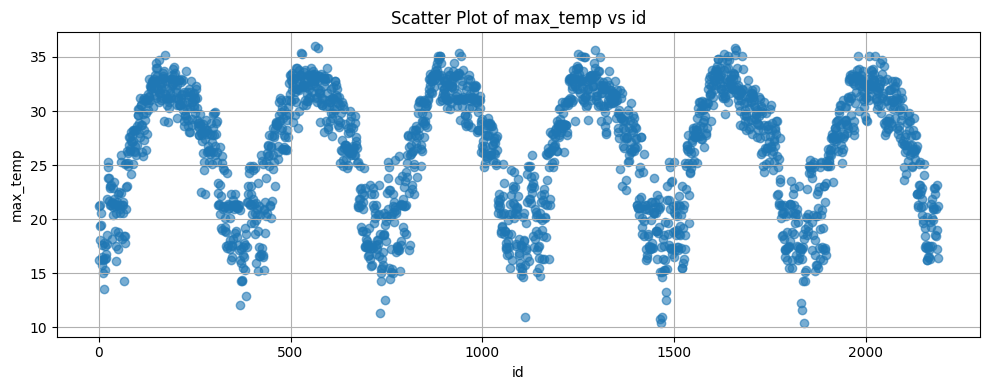

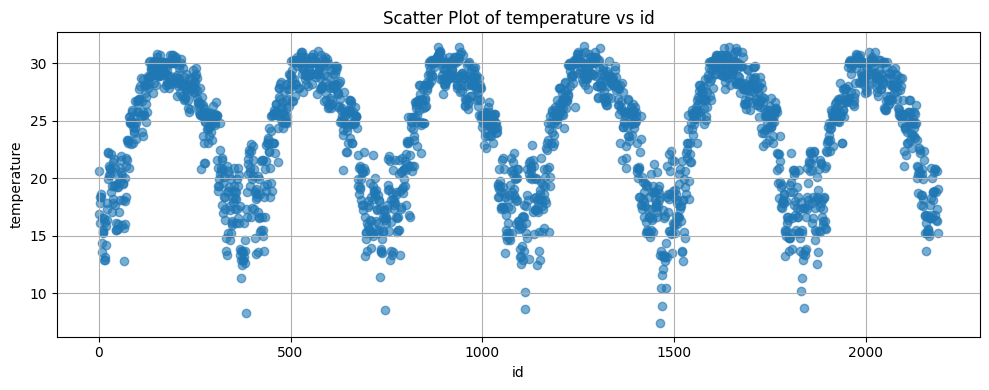

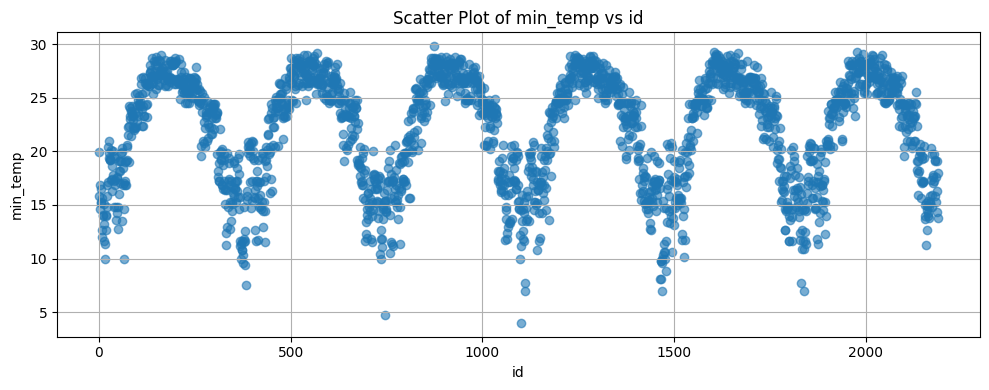

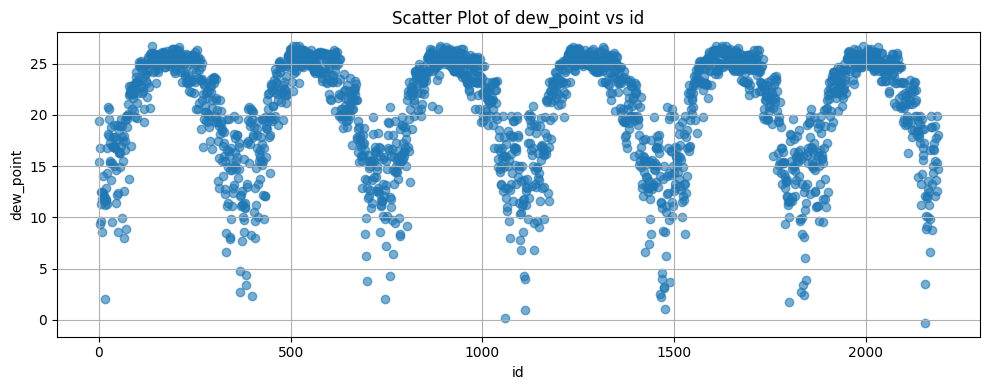

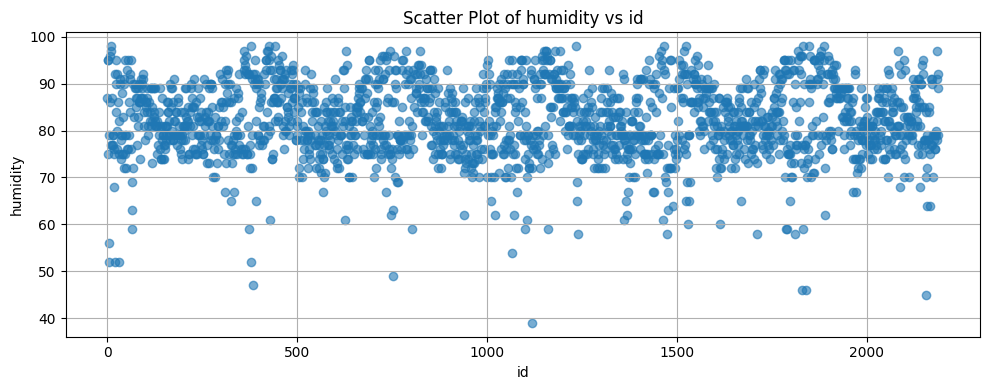

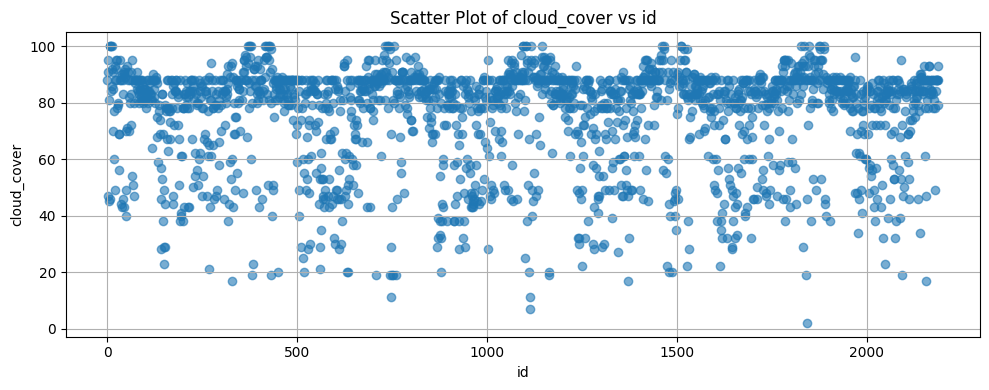

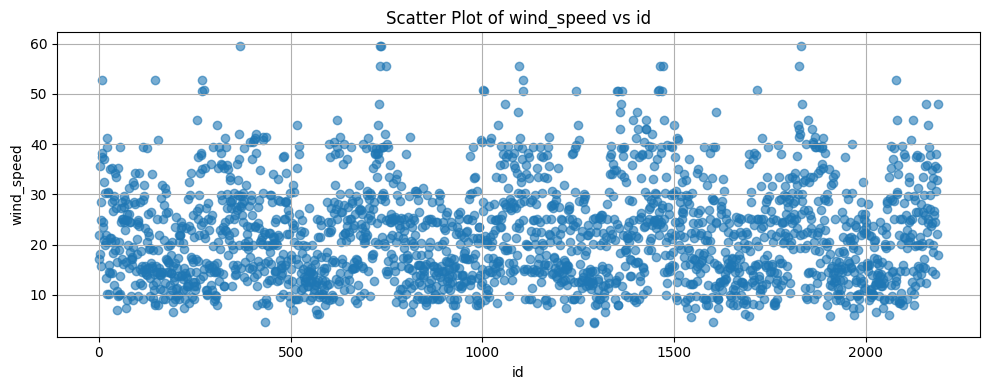

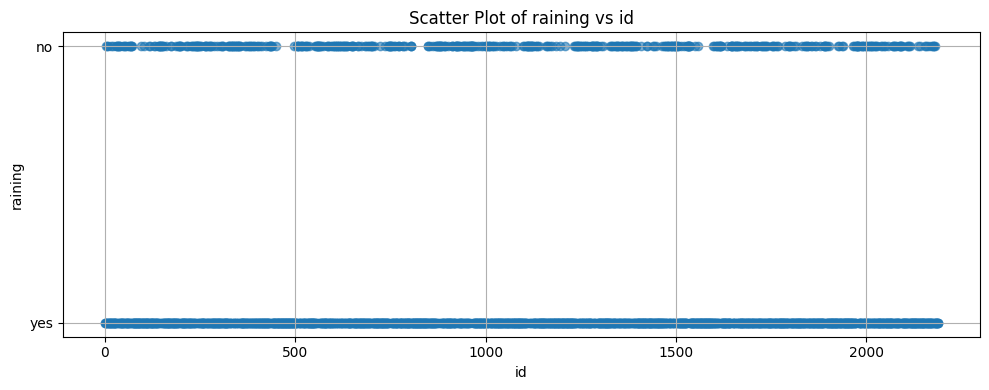

In [4]:
import matplotlib.pyplot as plt

# List of numerical columns to plot (adjust based on your dataset)
# Exclude 'recorded_day' and 'ID' if necessary; here we assume 'ID' is the x-axis.
numerical_columns = [col for col in df.columns if col not in ['recorded_day', 'ID']]

# Create a separate scatter plot for each numerical feature
for col in numerical_columns:
    plt.figure(figsize=(10, 4))
    plt.scatter(df['id'], df[col], alpha=0.6)
    plt.title(f'Scatter Plot of {col} vs id')
    plt.xlabel('id')
    plt.ylabel(col)
    plt.grid(True)
    plt.tight_layout()
    # Save the figure if needed
    plt.savefig(f'scatter_plot_{col}.png')
    plt.show()

In [5]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
df_imputed = df.copy()
df_imputed[df.select_dtypes(include=['float64']).columns] = imputer.fit_transform(df.select_dtypes(include=['float64']))

print("\nMissing Values After KNN Imputation:")
print(df_imputed.isnull().sum())


Missing Values After KNN Imputation:
id              0
recorded_day    0
air_pressure    0
max_temp        0
temperature     0
min_temp        0
dew_point       0
humidity        0
cloud_cover     0
wind_speed      0
raining         0
dtype: int64


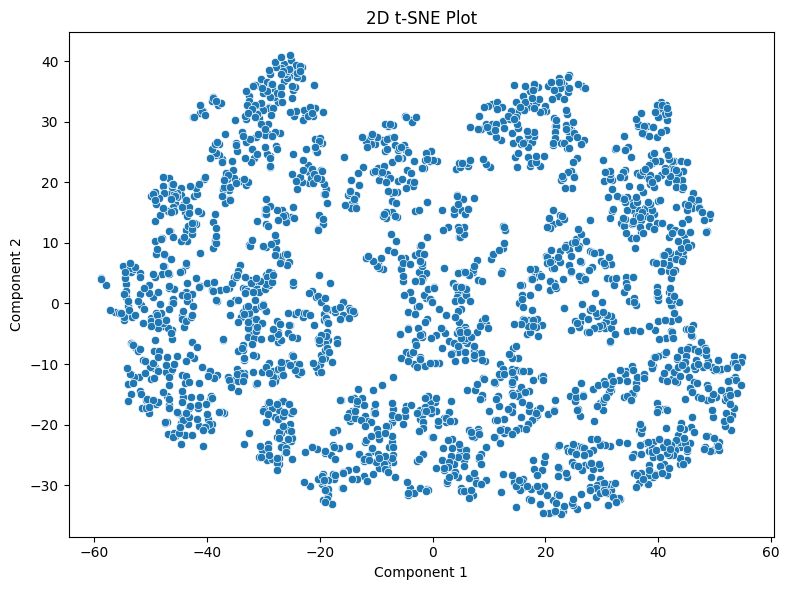

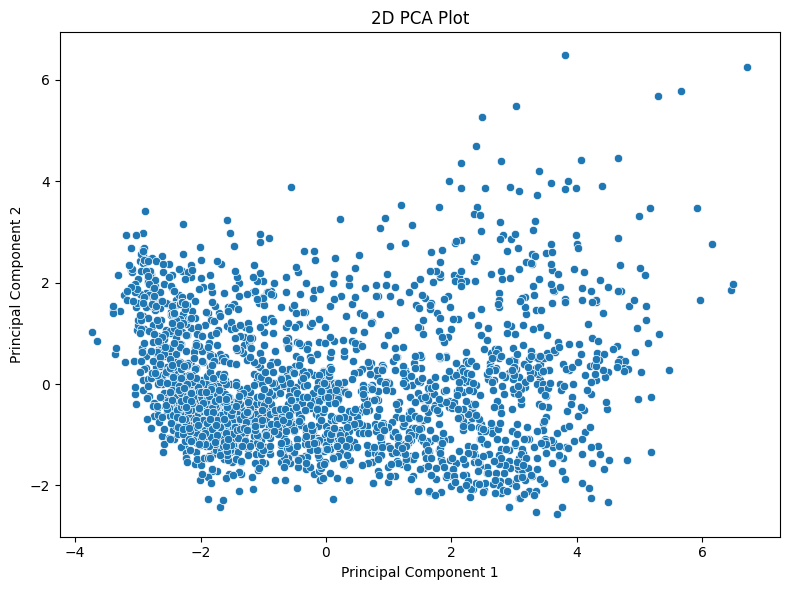

In [6]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns

features = [col for col in df_imputed.columns if col not in ['id','recorded_day','raining']]
X = df_imputed[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1])
plt.title('2D t-SNE Plot')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.tight_layout()
plt.savefig('tsne_plot.png')
plt.show()

# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1])
plt.title('2D PCA Plot')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.tight_layout()
plt.savefig('pca_plot.png')
plt.show()

In [7]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assume df is already loaded from E7_data.csv and preprocessed for missing values
# Exclude non-feature columns like 'ID' or 'recorded_day' if necessary:
features = [col for col in df.columns if col not in ['id','raining']]

# Standardize the features
Xn = df_imputed[features]
X_scaledn = scaler.fit_transform(Xn)
X_scaled_df = pd.DataFrame(X_scaledn, columns=features)

# Compute VIF for each feature
vif_data = pd.DataFrame()
vif_data['Feature'] = X_scaled_df.columns
vif_data['VIF'] = [variance_inflation_factor(X_scaled_df.values, i) for i in range(X_scaled_df.shape[1])]

print("VIF for each feature:")
print(vif_data)

VIF for each feature:
        Feature        VIF
0  recorded_day   1.091347
1  air_pressure   3.551576
2      max_temp  32.710982
3   temperature  83.474037
4      min_temp  45.645627
5     dew_point  12.036188
6      humidity   1.867260
7   cloud_cover   1.785725
8    wind_speed   1.169384


In [8]:
# Example: Manually determine the columns to drop (this should be based on your VIF analysis)
# Here we assume 'col1', 'col2', 'col3', etc. are the names of the columns with the highest VIF.
columns_to_drop_3 = ['max_temp', 'temperature', 'min_temp']
columns_to_drop_6 = ['max_temp', 'temperature', 'min_temp', 'dew_point', 'air_pressure', 'humidity']
columns_to_drop_8 = ['max_temp', 'temperature', 'min_temp', 'dew_point', 'air_pressure', 'humidity', 'cloud_cover', 'wind_speed']

# Create three reduced datasets
X_reduced_3 = X_scaled_df.drop(columns=columns_to_drop_3)
X_reduced_6 = X_scaled_df.drop(columns=columns_to_drop_6)
X_reduced_8 = X_scaled_df.drop(columns=columns_to_drop_8)

Full Feature Set Average ROC-AUC Score: 0.8799999999999999
Reduced (Drop 3 Columns) Average ROC-AUC Score: 0.8786531986531985
Reduced (Drop 6 Columns) Average ROC-AUC Score: 0.8613860830527498
Reduced (Drop 8 Columns) Average ROC-AUC Score: 0.4532210998877665


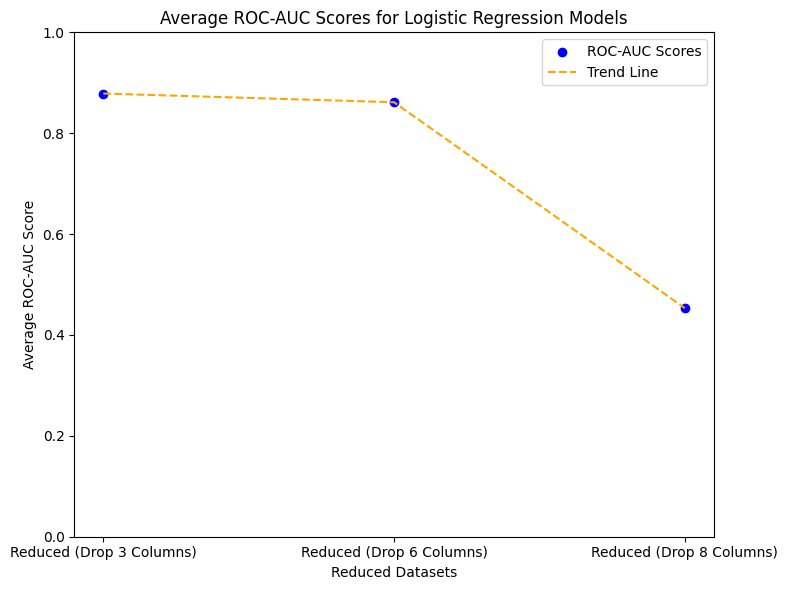

In [9]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# Assuming that your target variable is stored in df['raining']
y = df['raining']

def evaluate_model(X, y, model_name='Model'):
    model = LogisticRegression(max_iter=1000, solver='liblinear')
    # Using ROC-AUC as the scoring metric
    scores = cross_val_score(model, X, y, cv=5, scoring='roc_auc')
    avg_score = np.mean(scores)
    print(f"{model_name} Average ROC-AUC Score: {avg_score:}")
    return avg_score

roc_auc_full = evaluate_model(X_scaled_df, y, model_name='Full Feature Set')
roc_auc_3 = evaluate_model(X_reduced_3, y, model_name='Reduced (Drop 3 Columns)')
roc_auc_6 = evaluate_model(X_reduced_6, y, model_name='Reduced (Drop 6 Columns)')
roc_auc_8 = evaluate_model(X_reduced_8, y, model_name='Reduced (Drop 8 Columns)')

datasets = {
    'Reduced (Drop 3 Columns)': roc_auc_3,
    'Reduced (Drop 6 Columns)': roc_auc_6,
    'Reduced (Drop 8 Columns)': roc_auc_8
}

# Extract labels and scores
labels = list(datasets.keys())
scores = list(datasets.values())
# Plot the scatter plot with a line
plt.figure(figsize=(8, 6))
plt.scatter(labels, scores, color='blue', label='ROC-AUC Scores')
plt.plot(labels, scores, color='orange', linestyle='--', label='Trend Line')
plt.title('Average ROC-AUC Scores for Logistic Regression Models')
plt.ylabel('Average ROC-AUC Score')
plt.xlabel('Reduced Datasets')
plt.ylim(0, 1)
plt.legend()
plt.tight_layout()
plt.show()


In [10]:
from sklearn.decomposition import PCA

# PCA for 1, 3, and 6 principal components
pca_1 = PCA(n_components=1)
pca_3 = PCA(n_components=3)
pca_6 = PCA(n_components=6)

X_pca_1 = pca_1.fit_transform(X_scaled_df)
X_pca_3 = pca_3.fit_transform(X_scaled_df)
X_pca_6 = pca_6.fit_transform(X_scaled_df)

In [11]:
roc_auc_pca_1 = evaluate_model(X_pca_1, y, model_name='PCA (1 Component)')
roc_auc_pca_3 = evaluate_model(X_pca_3, y, model_name='PCA (3 Components)')
roc_auc_pca_6 = evaluate_model(X_pca_6, y, model_name='PCA (6 Components)')

PCA (1 Component) Average ROC-AUC Score: 0.5610493827160494
PCA (3 Components) Average ROC-AUC Score: 0.8717003367003366
PCA (6 Components) Average ROC-AUC Score: 0.879158249158249


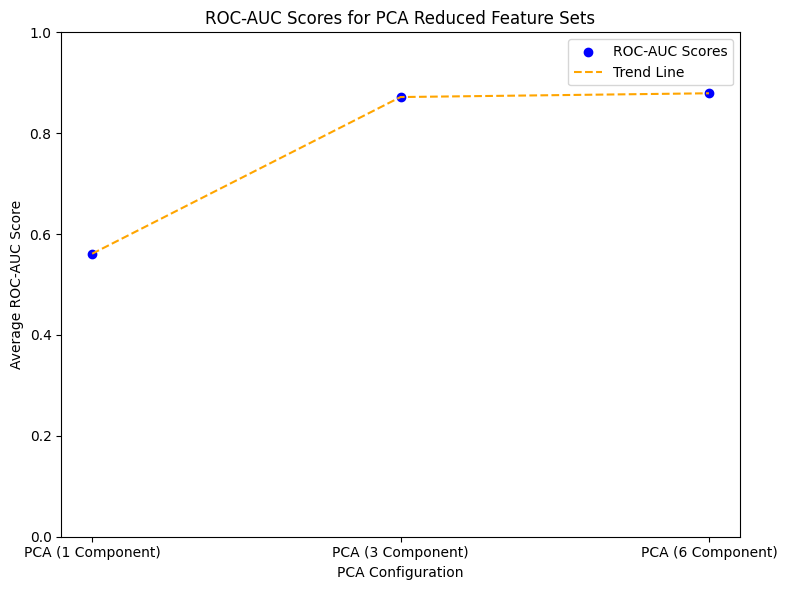

In [12]:
datasets = {
    'PCA (1 Component)': roc_auc_pca_1,
    'PCA (3 Component)': roc_auc_pca_3,
    'PCA (6 Component)': roc_auc_pca_6
}

# Extract labels and scores
pca_configs = list(datasets.keys())
roc_scores_pca = list(datasets.values())
plt.figure(figsize=(8, 6))
plt.scatter(pca_configs, roc_scores_pca, color='blue', label='ROC-AUC Scores')
plt.plot(pca_configs, roc_scores_pca, color='orange', linestyle='--', label='Trend Line')
plt.title('ROC-AUC Scores for PCA Reduced Feature Sets')
plt.xlabel('PCA Configuration')
plt.ylabel('Average ROC-AUC Score')
plt.ylim(0, 1)
plt.legend()
plt.tight_layout()
plt.savefig('roc_auc_pca_scatter_line.png')
plt.show()


In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
import numpy as np

# Assume X_optimal is your chosen feature set (e.g., from PCA (3 Components) or the Full Feature Set)
# and y is your target variable.
# For example:
X_optimal = X_reduced_3  # or one of your reduced datasets
y = df['raining']

# Create a Logistic Regression model with balanced class weights
lr_balanced = LogisticRegression(class_weight='balanced', max_iter=1000, solver='liblinear')

# Evaluate using 5-fold cross-validation with ROC-AUC scoring
scores_balanced = cross_val_score(lr_balanced, X_optimal, y, cv=5, scoring='roc_auc')
avg_score_balanced = np.mean(scores_balanced)

print("Logistic Regression with class_weight='balanced' Average ROC-AUC Score:", avg_score_balanced)


Logistic Regression with class_weight='balanced' Average ROC-AUC Score: 0.8780920314253647
